# Market Analyst Agent - Notebook

This notebook is for running and testing individual agents before wiring them into the API.

In [ ]:
# Load env vars from .env
import os
from pathlib import Path
from dotenv import load_dotenv

root = Path.cwd().parent if (Path.cwd() / 'backend').exists() is False else Path.cwd()
load_dotenv(root / '.env')

# Optional: sanity check for required envs
required = [
    'AZURE_OPENAI_ENDPOINT',
    'AZURE_OPENAI_KEY',
    'AZURE_OPENAI_DEPLOYMENT',
    'TAVILY_API_KEY',
]
missing = [k for k in required if not os.getenv(k)]
if missing:
    print('Missing env vars:', missing)
else:
    print('All required env vars present')


All required env vars present


In [2]:
# Import and build the web search agent
import sys
from pathlib import Path
from langchain.messages import HumanMessage

root = Path.cwd().parent if (Path.cwd() / 'backend').exists() is False else Path.cwd()
sys.path.append(str(root / 'backend'))

from app.agents.news.web_search_agent import build_web_search_agent

agent = build_web_search_agent()
print('Agent ready')


Agent ready


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\news\web_search_agent.py:46: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  TavilySearchResults(max_results=5),


In [3]:
# Run a query
query = 'latest quarterly earnings for NVIDIA'
result = agent.invoke({'messages': [HumanMessage(content=query)]})
result


{'messages': [HumanMessage(content='latest quarterly earnings for NVIDIA', additional_kwargs={}, response_metadata={}, id='f5dd89a3-ec26-4244-b72b-c0fd2e147a8c'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 191, 'total_tokens': 224, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DDuutXZUDZtiTL8xmg24Yuk0ymQO4', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'sa

In [4]:
print(result['messages'][-1].content  )

NVIDIA’s **latest reported quarterly earnings** are for **Q4 fiscal 2026 (quarter ended Jan. 25, 2026)**, reported **Feb. 25, 2026**:

- **Revenue:** **$68.1B** (**+20% QoQ**, **+73% YoY**)  
- **GAAP EPS (diluted):** **$1.76**  
- **Non-GAAP EPS (diluted):** **$1.62**  
- **GAAP net income:** **$43.0B**  
- **Data Center revenue:** **$62.3B**

Sources: NVIDIA investor/earnings release (Q4 FY26) via Financial Reports page and release details【https://investor.nvidia.com/financial-info/financial-reports/default.aspx】【https://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-fourth-quarter-and-fiscal-2026】; summary coverage【https://www.cnbc.com/2026/02/25/nvidia-nvda-earnings-report-q4-2026.html】.


## Technical Analysis Agent


In [5]:
# Import and run technical chart agent
from app.agents.technical.technical_chart_agent import analyze_stock_technical

result = analyze_stock_technical('AAPL')
result


TechnicalAnalysisResult(symbol='AAPL', image_path='data\\processed\\AAPL_technical.png', summary='- **Trend (price action):** AAPL sold off from late Nov into mid‑Jan (lower highs/lows), then **reversed into an uptrend** late Jan/early Feb. The last couple of sessions show a **minor pullback** from the recent rebound, but price is still holding above the mid‑Feb lows.\n- **Momentum (MACD):** MACD **bottomed and turned up** in late Jan with a **bullish crossover** (MACD line over signal) and expanding positive histogram into early Feb. Recently, the histogram has **contracted toward zero** and the lines are **flattening**, signaling **waning upside momentum** (not a clear bearish cross yet).\n- **Notable crossovers:** Key **bullish MACD crossover** occurred late Jan/early Feb; since then momentum has cooled, with MACD hovering near the signal line.\n- **RSI (overbought/oversold):** RSI dipped near/under **30 (oversold)** around mid‑Jan, then recovered. It’s now around the **50–55** area

In [6]:
print(result.summary)

- **Trend (price action):** AAPL sold off from late Nov into mid‑Jan (lower highs/lows), then **reversed into an uptrend** late Jan/early Feb. The last couple of sessions show a **minor pullback** from the recent rebound, but price is still holding above the mid‑Feb lows.
- **Momentum (MACD):** MACD **bottomed and turned up** in late Jan with a **bullish crossover** (MACD line over signal) and expanding positive histogram into early Feb. Recently, the histogram has **contracted toward zero** and the lines are **flattening**, signaling **waning upside momentum** (not a clear bearish cross yet).
- **Notable crossovers:** Key **bullish MACD crossover** occurred late Jan/early Feb; since then momentum has cooled, with MACD hovering near the signal line.
- **RSI (overbought/oversold):** RSI dipped near/under **30 (oversold)** around mid‑Jan, then recovered. It’s now around the **50–55** area—**neutral**, not overbought (>70) or oversold (<30).
- **Near-term signals:** With **RSI neutral** a

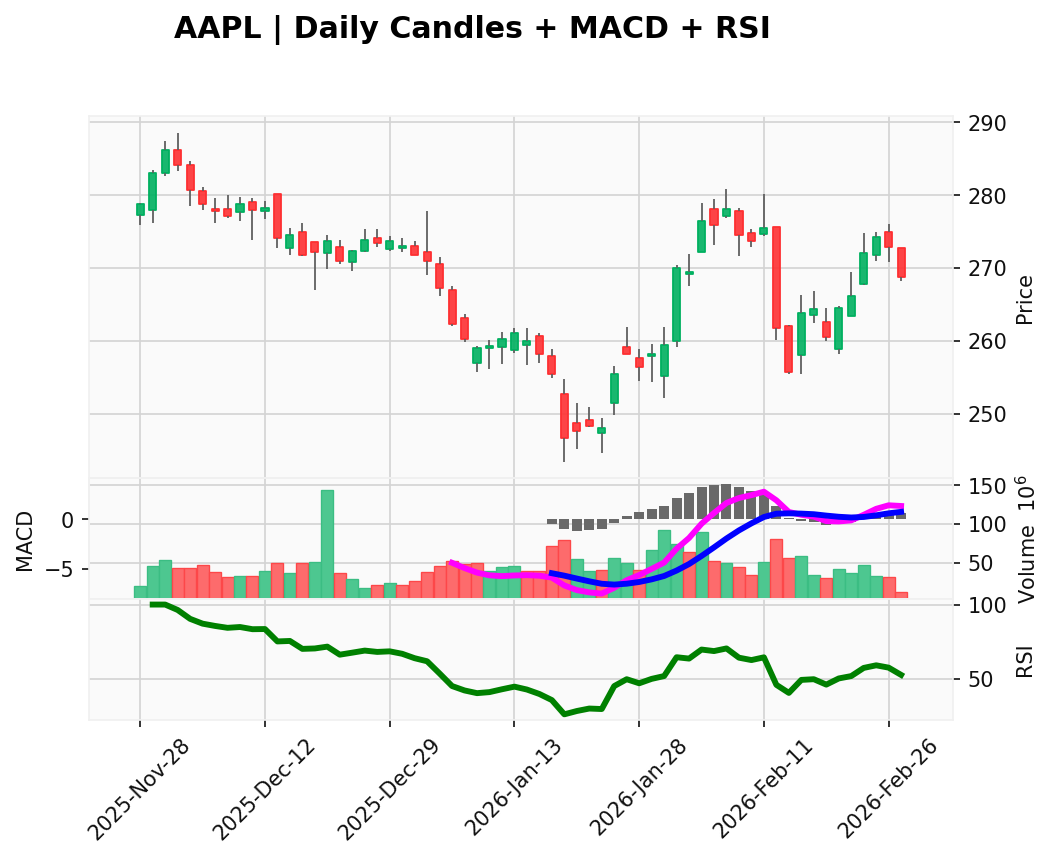

In [7]:
# Display chart image
from IPython.display import Image, display

display(Image(filename=result.image_path))


## Fundamental Analysis Agent - Ingestion

This cell ingests a company PDF into pgvector using Azure Document Intelligence.


In [10]:
root / "ingested_documents" / f"{filename}.md",

(WindowsPath('c:/Users/rushi/OneDrive - ImmersiLearn Education Services LLP/Projects/LLM Projects/market-analyst-agent/ingested_documents/apple-10k-report.md'),)

In [11]:
import sys
from pathlib import Path

root = Path.cwd().parent if (Path.cwd() / "backend").exists() is False else Path.cwd()
sys.path.append(str(root / "backend"))

from app.services.document_ingestion import ingest_pdf_to_pgvector
# filename = "VBL-AR-2024"
# pdf_path = root / "documents" / f"{filename}.pdf"


filename = "apple-10k-report"
pdf_path = root / "documents" / f"{filename}.pdf"


result = ingest_pdf_to_pgvector(
    pdf_path=pdf_path,
    company="APPLE",
    year="2025",
    markdown_output_path=root / "apple" / f"{filename}.md",
)
result


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\.venv\Lib\site-packages\langchain_community\vectorstores\pgvector.py:490: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  store = cls(


IngestionResult(company='APPLE', source_path='c:\\Users\\rushi\\OneDrive - ImmersiLearn Education Services LLP\\Projects\\LLM Projects\\market-analyst-agent\\documents\\apple-10k-report.pdf', chunks_stored=147, collection_name='fundamental_docs', markdown_path='c:\\Users\\rushi\\OneDrive - ImmersiLearn Education Services LLP\\Projects\\LLM Projects\\market-analyst-agent\\apple\\apple-10k-report.md')

## Fundamental Analysis Agent - Load Markdown (No PDF)

Use this if you already have a markdown file and only want to push it into pgvector.


In [ ]:
import sys
from pathlib import Path

root = Path.cwd().parent if (Path.cwd() / "backend").exists() is False else Path.cwd()
sys.path.append(str(root / "backend"))

from app.services.document_ingestion import split_markdown_into_chunks, store_chunks_pgvector, _attach_metadata

# Point to an existing markdown file produced by Azure Document Intelligence
markdown_path = root / "apple" / f"{filename}.md"
markdown_text = markdown_path.read_text(encoding="utf-8")

chunks = split_markdown_into_chunks(markdown_text)
enriched = _attach_metadata(
    chunks,
    company="APPLE",
    doc_type="annual_report",
    year="2025",
    source_path=str(markdown_path),
)

store_chunks_pgvector(
    enriched,
    collection_name="fundamental_docs",
    connection_string=None,
)

print(f"Stored {len(enriched)} chunks from markdown.")


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\.venv\Lib\site-packages\langchain_community\vectorstores\pgvector.py:490: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  store = cls(


Stored 1069 chunks from markdown.


## Fundamental Analysis Agent - Run

Run the agentic RAG over the ingested company data.


In [12]:
import sys
from pathlib import Path

root = Path.cwd().parent if (Path.cwd() / "backend").exists() is False else Path.cwd()
sys.path.append(str(root / "backend"))

from app.agents.fundamental.fundamental_agent import analyze_fundamentals

# General fundamentals summary
general = analyze_fundamentals(
    company="APPLE",
    mode="general",
)
general.answer


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: This class is pending deprecation and may be removed in a future version. You can swap to using the `PGVector` implementation in `langchain_postgres`. Please read the guidelines in the doc-string of this class to follow prior to migrating as there are some differences between the implementations. See <https://github.com/langchain-ai/langchain-postgres> for details about the new implementation.
  return PGVector(
c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been ch

Company Retriever Tool Invoked with query: Provide key financial highlights, revenue, net income, cash flow, guidance, risks, and segment performance. Include latest annual report summary. APPLE
Retrieved 8 documents for query: Provide key financial highlights, revenue, net income, cash flow, guidance, risks, and segment performance. Include latest annual report summary.
{'messages': [AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 177, 'total_tokens': 223, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DDv6lvp39EVNjdDKBK95Gc8ACfYfy', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'tool_cal

{'messages': [AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 177, 'total_tokens': 223, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DDv6lvp39EVNjdDKBK95Gc8ACfYfy', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='lc_run--019c9ff4-f822-77c0-a833-7f447efe5326-0', tool_calls=[{'name': 'company_retriever', 'args': {'query': 'Provide key financial highlights, revenue, net income, cash flow, guidance, risks, and segment performance. Include latest annual report summary.'}, 'id': 'call_UGUX4upLEwaWVJ1kdNtb2KTA', 'type': 'tool_call

In [13]:
print(general.answer['messages'][-1].content)

## Apple FY2025 (fiscal year ended Sept 27, 2025) — financial highlights (from 2025 Form 10‑K)

### Income statement
- **Total net sales:** **$416,161M** (2024: $391,035M; 2023: $383,285M)  
  - **Products:** $307,003M (2024: $294,866M)  
  - **Services:** $109,158M (2024: $96,169M)
- **Gross margin:** **$195,201M** (2024: $180,683M)
- **Operating income:** **$133,050M** (2024: $123,216M)
- **Net income:** **$112,010M** (2024: $93,736M; 2023: $96,995M)
- **EPS (diluted):** **$7.46** (2024: $6.08)

### Cash flow (FY2025)
- **Cash generated by operating activities:** **$111,482M** (2024: $118,254M)
- **Cash generated by investing activities:** **$15,195M** (2024: $2,935M)
- **Cash used in financing activities:** **$(120,686)M** (2024: $(121,983)M)
- **Ending cash, cash equivalents & restricted cash:** **$35,934M** (2024: $29,943M)
- **Capital expenditures (PP&E):** **$(12,715)M** (2024: $(9,447)M)
- **Shareholder returns:** **$90,711M** share repurchases; **$15,421M** dividends/dividend 

In [14]:
# Specific question
qa = analyze_fundamentals(
    company="APPLE",
    question="How has free cash flow changed year over year?",
    mode="qa",
)
qa.answer

c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  return PGVector(


Company Retriever Tool Invoked with query: Provide key financial highlights, revenue, net income, cash flow, guidance, risks, and segment performance from the latest annual report. Include management discussion and outlook. APPLE
Retrieved 8 documents for query: Provide key financial highlights, revenue, net income, cash flow, guidance, risks, and segment performance from the latest annual report. Include management discussion and outlook.
Company Retriever Tool Invoked with query: Apple 2025 Form 10-K net sales by product category iPhone Mac iPad Wearables Home and Accessories Services table APPLE
Company Retriever Tool Invoked with query: Apple 2025 Form 10-K balance sheet cash marketable securities total assets total liabilities shareholders equity APPLE
Company Retriever Tool Invoked with query: Apple 2025 Form 10-K gross margin percentage products services total 2025 2024 APPLE
Company Retriever Tool Invoked with query: Apple 2025 Form 10-K outlook guidance or 'expects' 'future' '

{'messages': [AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 177, 'total_tokens': 228, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DDv8S5MVIebU9VhCw3XxXap0GmX3G', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='lc_run--019c9ff6-9187-75c0-a3d0-271dfef0cb47-0', tool_calls=[{'name': 'company_retriever', 'args': {'query': 'Provide key financial highlights, revenue, net income, cash flow, guidance, risks, and segment performance from the latest annual report. Include management discussion and outlook.'}, 'id': 'call_73pj1u2mWi

In [22]:
print(qa.answer['messages'][-1].content)

## Apple FY2025 (Form 10‑K; fiscal year ended Sept 27, 2025) — fundamental highlights

### Income statement (FY2025 vs FY2024)
- **Total net sales:** **$416.2B** (2024: **$391.0B**)  
  - **Products:** $307.0B (2024: $294.9B)  
  - **Services:** $109.2B (2024: $96.2B)
- **Gross margin:** **$195.2B** (2024: $180.7B)  
  - **Gross margin %:** **46.9%** (2024: 46.2%)  
  - Products GM% **36.8%** (down from 37.2%); Services GM% **75.4%** (up from 73.9%)
- **Operating income:** **$133.1B** (2024: $123.2B)
- **Net income:** **$112.0B** (2024: $93.7B)
- **EPS (diluted):** **$7.46** (2024: $6.08)

### Revenue mix / product performance (FY2025)
Net sales by category:
- **iPhone:** **$209.6B** (+4% YoY) — increase attributed to **higher net sales of Pro models**
- **Mac:** **$33.7B** (+12%) — higher laptop and desktop sales
- **iPad:** **$28.0B** (+5%) — higher iPad Air/mini/iPad, partly offset by lower iPad Pro
- **Wearables, Home & Accessories:** **$35.7B** (−4%) — lower Accessories and Wearab

## Supervisor Agent

Orchestrates technical + fundamental + web news and returns a 6-month synthesis.


In [23]:
import sys
from pathlib import Path

root = Path.cwd()
if str(root / 'backend') not in sys.path:
    sys.path.append(str(root / 'backend'))

from app.agents.supervisor import analyze_market_supervised

supervisor_result = analyze_market_supervised(
    symbol='AAPL',
    company='APPLE',
    fundamental_question='Summarize key strengths, risks, and 6-month fundamental outlook.',
    news_query='Apple latest company news catalysts risks',
    technical_period='3mo',
    technical_interval='1d',
    collection_name='fundamental_docs',
    top_k=8,
)

supervisor_result


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  return PGVector(


Company Retriever Tool Invoked with query: company name and annual report year; business overview APPLE
Company Retriever Tool Invoked with query: income statement revenue net income for latest year APPLE
Company Retriever Tool Invoked with query: segment information and key products/services APPLE
Company Retriever Tool Invoked with query: risk factors or outlook discussion APPLE
Retrieved 8 documents for query: company name and annual report year; business overview
Retrieved 8 documents for query: income statement revenue net income for latest year
Retrieved 8 documents for query: risk factors or outlook discussion
Retrieved 8 documents for query: segment information and key products/services
{'messages': [AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 108, 'prompt_tokens': 177, 'total_tokens': 285, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_pred

SupervisorAnalysisResult(symbol='AAPL', company='APPLE', technical={'symbol': 'AAPL', 'image_path': 'data\\processed\\AAPL_technical.png', 'summary': '### AAPL (Daily) — Candles + MACD + RSI\n\n**Trend**\n- Medium-term uptrend into late Nov (higher highs), followed by a **sharp pullback in Dec–early Jan**.\n- Since mid/late Jan, price has **rebounded and is range-to-slightly-up**, holding mostly **~260–275** with recent consolidation near the upper half of that range.\n\n**Momentum (MACD)**\n- MACD was negative during the Dec/Jan selloff, then **bullishly crossed up in late Jan** (MACD line over signal) as the rebound started.\n- Currently MACD is **near/just above the zero line** with a **flattening histogram**, suggesting **bull momentum is present but weakening** (more “stalling” than accelerating).\n\n**Notable crossovers**\n- **Bullish MACD crossover (late Jan)**: confirmed the rebound.\n- No clear fresh bearish crossover yet, but the **tight/flat MACD** implies a crossover risk i

In [24]:
print('6M Rating:', supervisor_result.synthesis.get('investment_rating_6m'))
print('Stance:', supervisor_result.synthesis.get('stance'))
print('\nFinal Thesis:\n')
print(supervisor_result.synthesis.get('final_thesis'))


6M Rating: 6
Stance: Neutral

Final Thesis:

Over the next 6 months, Apple’s strong scale and ecosystem position (including Services) supports resilience, but management-flagged macro and tariff/trade risks plus a technically range-bound chart with fading momentum argue for a neutral stance until either a clear breakout above recent highs or a fundamental catalyst emerges.


## Agent API Calls

Call all agents through FastAPI endpoints (`/agents/*`). Start API first with:
`uvicorn app.main:app --reload --app-dir backend`


In [31]:
import json
from urllib import request, error

API_BASE = 'http://127.0.0.1:8000'

def post_json(path: str, payload: dict):
    body = json.dumps(payload).encode("utf-8")
    req = request.Request(
        url=f"{API_BASE}{path}",
        data=body,
        headers={"Content-Type": "application/json"},
        method="POST",
    )
    with request.urlopen(req) as resp:
        return json.loads(resp.read().decode("utf-8"))

def get_json(path: str):
    with request.urlopen(f"{API_BASE}{path}") as resp:
        return json.loads(resp.read().decode("utf-8"))

try:
    print(get_json("/health"))
except error.URLError as e:
    raise RuntimeError("API is not reachable. Start uvicorn before running these cells.") from e


{'status': 'ok'}


In [39]:
# 1) Web search agent via API
web_api = post_json("/agents/web-search", {"query": "Apple latest strategic developments and key risks"})
web_api


{'result': {'messages': [{'content': '',
    'additional_kwargs': {'refusal': None},
    'response_metadata': {'token_usage': {'completion_tokens': 35,
      'prompt_tokens': 182,
      'total_tokens': 217,
      'completion_tokens_details': {'accepted_prediction_tokens': 0,
       'audio_tokens': 0,
       'reasoning_tokens': 0,
       'rejected_prediction_tokens': 0},
      'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
     'model_provider': 'openai',
     'model_name': 'gpt-5.2-2025-12-11',
     'system_fingerprint': None,
     'id': 'chatcmpl-DE5MQ3U1KoUyyS6Yd8ipirLLr2LfV',
     'prompt_filter_results': [{'prompt_index': 0,
       'content_filter_results': {}}],
     'finish_reason': 'tool_calls',
     'logprobs': None,
     'content_filter_results': {}},
    'type': 'ai',
    'name': None,
    'id': 'lc_run--019ca24e-52ac-78e0-b80d-0b46b6c69e5e-0',
    'tool_calls': [{'name': 'tavily_search_results_json',
      'args': {'query': '2024 2025 global market size A

In [ ]:
# 2) Technical agent via API
technical_api = post_json("/agents/technical", {"symbol": "AAPL", "period": "3mo", "interval": "1d"})
technical_api


In [ ]:
# 3) Fundamental agent via API
fundamental_api = post_json(
    "/agents/fundamental",
    {
        "company": "APPLE",
        "mode": "qa",
        "question": "Summarize key strengths, risks, and near-term outlook from the latest report.",
        "collection": "fundamental_docs",
        "top_k": 8
    }
)
fundamental_api


In [ ]:
# 4) Supervisor agent via API
supervisor_api = post_json(
    "/agents/supervisor",
    {
        "symbol": "AAPL",
        "company": "APPLE",
        "fundamental_question": "Summarize key strengths, risks, and 6-month fundamental outlook.",
        "news_query": "Apple latest company news catalysts risks",
        "technical_period": "3mo",
        "technical_interval": "1d",
        "collection": "fundamental_docs",
        "top_k": 8
    }
)
supervisor_api


In [ ]:
print('Supervisor 6M Rating:', supervisor_api['synthesis'].get('investment_rating_6m'))
print('Supervisor Stance:', supervisor_api['synthesis'].get('stance'))
print('\nSupervisor Thesis:\n')
print(supervisor_api['synthesis'].get('final_thesis'))
